#### Importing Libraries

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.mode.chained_assignment = None

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

## Data Preprocessing

#### Reading & Viewing Data

In [77]:
df = pd.read_excel("sdsp_patients.xlsx")

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 51 columns):
Disease       400 non-null object
Feature_1     400 non-null object
Feature_2     400 non-null float64
Feature_3     400 non-null object
Feature_4     400 non-null float64
Feature_5     400 non-null float64
Feature_6     400 non-null object
Feature_7     400 non-null object
Feature_8     400 non-null object
Feature_9     400 non-null object
Feature_10    400 non-null object
Feature_11    400 non-null object
Feature_12    400 non-null object
Feature_13    400 non-null object
Feature_14    400 non-null object
Feature_15    400 non-null object
Feature_16    400 non-null object
Feature_17    400 non-null object
Feature_18    400 non-null object
Feature_19    400 non-null object
Feature_20    400 non-null object
Feature_21    400 non-null object
Feature_22    400 non-null object
Feature_23    400 non-null object
Feature_24    400 non-null object
Feature_25    400 non-null object
Feature_

In [79]:
df.head()

,Disease,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,...,Feature_41,Feature_42,Feature_43,Feature_44,Feature_45,Feature_46,Feature_47,Feature_48,Feature_49,Feature_50
0,Disease_1,Male,28.0,130,96.0,2.0,No,Yes,Yes,No,...,No,No,No,0,No,No,No,No,No,No
1,Disease_1,Male,18.0,95,46.0,3.0,Yes,No,No,No,...,No,Yes,No,0,No,No,No,No,No,No
2,Disease_1,Male,44.0,152,150.0,1.0,No,Yes,No,Yes,...,Yes,No,No,0,No,No,No,No,No,No
3,Disease_1,Male,19.0,112,66.0,18.0,No,No,No,Yes,...,No,Yes,No,0,No,No,No,No,No,No
4,Disease_1,Male,17.5,105.5,54.0,3.0,No,No,Yes,Yes,...,No,No,No,0,No,No,No,No,Yes,No


#### Fixing some problems on dataset

In [80]:
# Some missing values are indicated as empty strings (' ') in df. We convert them to np.nan like rest of the missing values.
for column_name in df.columns:
    if len(df[column_name][df[column_name] == ' ']) != 0:
        df[column_name].replace(' ', np.nan, inplace=True)

# Also, data type of Feature_3 is given wrong. It should be float64.
df['Feature_3'].astype('float64')

E:\Programlar\Anacondaaaa\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


0      130.0
1       95.0
2      152.0
3      112.0
4      105.5
       ...  
395    142.0
396    172.0
397    147.0
398    138.0
399    130.0
Name: Feature_3, Length: 400, dtype: float64

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 51 columns):
Disease       400 non-null object
Feature_1     400 non-null object
Feature_2     400 non-null float64
Feature_3     398 non-null float64
Feature_4     400 non-null float64
Feature_5     400 non-null float64
Feature_6     400 non-null object
Feature_7     400 non-null object
Feature_8     400 non-null object
Feature_9     400 non-null object
Feature_10    400 non-null object
Feature_11    400 non-null object
Feature_12    400 non-null object
Feature_13    400 non-null object
Feature_14    400 non-null object
Feature_15    400 non-null object
Feature_16    400 non-null object
Feature_17    400 non-null object
Feature_18    400 non-null object
Feature_19    400 non-null object
Feature_20    400 non-null object
Feature_21    400 non-null object
Feature_22    400 non-null object
Feature_23    400 non-null object
Feature_24    400 non-null object
Feature_25    400 non-null object
Feature

#### Splitting Dataset

In [82]:
X = df.drop('Disease', axis=1)
y = df['Disease']

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#### Handling Missing Values

In [84]:
def impute_missing_values(data):
    missing_valued_columns = data.columns[data.isnull().any()].tolist()
    for column_name in missing_valued_columns:
        if data[column_name].dtype == 'O':
            # most frequent value
            imputed_value = data.loc[:,column_name].mode()[0]
        elif data[column_name].dtype == 'float64':
            #mean value
            imputed_value = df[column_name].mean()
        data.loc[:,column_name].fillna(imputed_value, inplace=True)

In [85]:
# train data
impute_missing_values(X_train)

# test data
impute_missing_values(X_test)

#### Class Distribution on Train Data

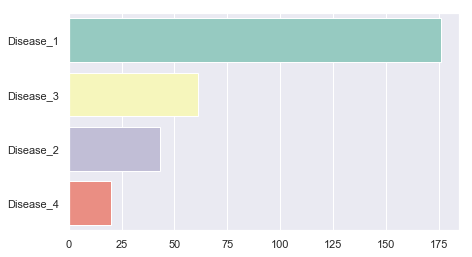

In [86]:
sns.set(rc={'figure.figsize':(7,4)})
sns.barplot(x = y_train.value_counts().values, y=y_train.value_counts().index, palette="Set3")

#### Class Distribution on Test Data

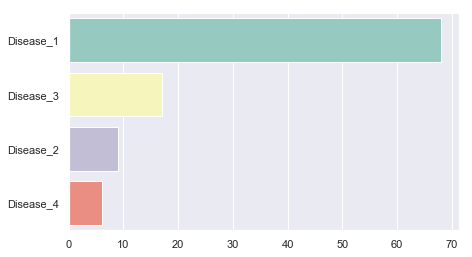

In [87]:
sns.barplot(x = y_test.value_counts().values, y=y_test.value_counts().index, palette="Set3")

#### Encoding Categorical Variables

##### Label Encoding for bi-variable features

In [88]:
column_names = list(X_train.columns)
column_names.remove('Feature_28')
column_names.remove('Feature_29')

In [89]:
for column_name in column_names:
    if X_train[column_name].dtype == 'O':
        le = LabelEncoder()
        le.fit(X_train[column_name])
        X_train[column_name] = le.transform(X_train[column_name])
        X_test[column_name] = le.transform(X_test[column_name])

#### One-Hot Encoding for multi-variable features (Feature_28, Feature_29)

In [90]:
X_train = pd.get_dummies(X_train)

In [91]:
X_test = pd.get_dummies(X_test)

In [92]:
X_train

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,...,Feature_48,Feature_49,Feature_50,Feature_28_1-2 Days a Month,Feature_28_1-2 Days a Week,Feature_28_3-4 Days a Week,Feature_28_Every Day,Feature_29_Evenings,Feature_29_Mornings,Feature_29_No Difference
247,0,15.0,96.0,44.0,24.0,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
110,0,55.0,161.0,204.0,6.0,0,1,0,0,0,...,0,1,1,0,0,0,1,0,1,0
16,1,21.0,120.0,96.0,48.0,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
66,1,15.0,102.0,60.0,24.0,0,0,1,0,0,...,0,0,0,0,0,0,1,1,0,0
153,0,27.0,135.0,120.0,8.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,0,18.0,111.0,72.0,48.0,0,1,0,0,0,...,0,0,0,0,0,0,1,1,0,0
106,1,40.0,152.0,180.0,6.0,0,0,0,1,0,...,1,0,0,0,0,0,1,0,1,0
270,0,75.0,175.0,197.0,102.0,0,1,1,0,0,...,0,0,0,0,0,1,0,0,0,1
348,0,38.0,147.0,156.0,12.0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [93]:
X_test

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,...,Feature_48,Feature_49,Feature_50,Feature_28_1-2 Days a Month,Feature_28_1-2 Days a Week,Feature_28_3-4 Days a Week,Feature_28_Every Day,Feature_29_Evenings,Feature_29_Mornings,Feature_29_No Difference
209,1,90.00,163.0,192.0,120.0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
280,0,16.50,108.0,54.0,20.0,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0
33,1,14.00,94.0,48.0,12.0,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
210,0,17.00,101.0,48.0,12.0,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
93,1,40.00,143.0,171.0,3.0,0,1,1,0,1,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314,1,15.50,97.0,40.0,34.0,0,1,0,0,0,...,0,0,1,1,0,0,0,0,0,1
373,0,45.00,156.0,156.0,18.0,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,1
380,1,25.25,115.0,72.0,36.0,0,1,1,0,0,...,0,0,0,1,0,0,0,1,0,0
239,0,23.00,111.0,72.0,12.0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0


#### Data Normalization

In [94]:
scaler_train = MinMaxScaler()
scaler_train.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [95]:
# backup df, since we concatenate the train df and test df at last step.
X_train_backup = X_train.copy()
X_train = pd.DataFrame(scaler_train.transform(X_train), columns=X_train.columns)

In [96]:
scaler_test = MinMaxScaler()
scaler_test.fit(X_test)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [97]:
# backup df, since we concatenate the train df and test df at last step.
X_test_backup = X_test.copy()
X_test = pd.DataFrame(scaler_test.transform(X_test), columns=X_test.columns)

In [98]:
X_train

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,...,Feature_48,Feature_49,Feature_50,Feature_28_1-2 Days a Month,Feature_28_1-2 Days a Week,Feature_28_3-4 Days a Week,Feature_28_Every Day,Feature_29_Evenings,Feature_29_Mornings,Feature_29_No Difference
0,0.0,0.067568,0.190476,0.159204,0.142551,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.608108,0.809524,0.955224,0.035370,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,1.0,0.148649,0.419048,0.417910,0.285459,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,1.0,0.067568,0.247619,0.238806,0.142551,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,0.0,0.229730,0.561905,0.537313,0.047279,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.0,0.108108,0.333333,0.298507,0.285459,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
296,1.0,0.405405,0.723810,0.835821,0.035370,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
297,0.0,0.878378,0.942857,0.920398,0.607003,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
298,0.0,0.378378,0.676190,0.716418,0.071097,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [99]:
X_test

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,...,Feature_48,Feature_49,Feature_50,Feature_28_1-2 Days a Month,Feature_28_1-2 Days a Week,Feature_28_3-4 Days a Week,Feature_28_Every Day,Feature_29_Evenings,Feature_29_Mornings,Feature_29_No Difference
0,1.0,1.000000,0.868132,0.931034,0.833183,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.081250,0.263736,0.137931,0.138111,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,1.0,0.050000,0.109890,0.103448,0.082505,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,0.0,0.087500,0.186813,0.103448,0.082505,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.375000,0.648352,0.810345,0.019949,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1.0,0.068750,0.142857,0.057471,0.235421,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
96,0.0,0.437500,0.791209,0.724138,0.124209,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
97,1.0,0.190625,0.340659,0.241379,0.249322,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
98,0.0,0.162500,0.296703,0.241379,0.082505,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


#### Target Variables : Label Encoding

In [100]:
le_y_train = LabelEncoder()

In [101]:
le_y_train.fit(y_train)

LabelEncoder()

In [102]:
y_train_le = le_y_train.transform(y_train)

In [103]:
y_test_le = le_y_train.transform(y_test)

### Feature Selection

##### Feature selection by variance

If a feature has zero variance or so small variance, then this feature wouldn't be very useful. We could simply drop these kind of features to reduce dimensionality. (Normalized features provide better understanding for variances.) However, we have to analyze more to be sure that which features we should drop.

In [104]:
print("Variance of Features \n")
print(X_train.var().sort_values())

Variance of Features 

Feature_25                     0.000000
Feature_19                     0.000000
Feature_16                     0.000000
Feature_12                     0.003333
Feature_23                     0.003333
Feature_21                     0.006644
Feature_18                     0.006644
Feature_14                     0.006644
Feature_17                     0.006644
Feature_26                     0.006644
Feature_11                     0.009933
Feature_24                     0.009933
Feature_22                     0.013200
Feature_20                     0.013200
Feature_15                     0.016444
Feature_5                      0.019698
Feature_44                     0.024554
Feature_38                     0.026042
Feature_2                      0.033942
Feature_3                      0.043596
Feature_46                     0.044638
Feature_13                     0.047659
Feature_10                     0.050658
Feature_36                     0.053634
Feature_4        

We can directly drop the features 'Feature_16', 'Feature_19' and 'Feature_25', since their variance is 0. That means they all have only one unique variable and so they are useless. 

We can also consider to drop features, since they are also has so small variance: Feature_25, Feature_19, Feature_16, Feature_12, Feature_23, Feature_21, Feature_18, Feature_14, Feature_17, Feature_26, Feature_11, Feature_24, Feature_22, Feature_20, Feature_15 (The feature names are aligned with respect to their variance value). Feature_15 has the highest variance. And 295 samples out of 300 has Feature_15 value of 1 and the rest (5) are 0.

So, we just accept the features that has variance of 0.017 or higher:

In [105]:
to_drop_features_variance = list(X_train.var().sort_values()[X_train.var().sort_values() < 0.017].index)

In [106]:
X_train_selected_features = X_train.drop(to_drop_features_variance, axis=1)

In [107]:
X_train_selected_features.columns

Index(['Feature_1', 'Feature_2', 'Feature_3', 'Feature_4', 'Feature_5',
       'Feature_6', 'Feature_7', 'Feature_8', 'Feature_9', 'Feature_10',
       'Feature_13', 'Feature_27', 'Feature_30', 'Feature_31', 'Feature_32',
       'Feature_33', 'Feature_34', 'Feature_35', 'Feature_36', 'Feature_37',
       'Feature_38', 'Feature_39', 'Feature_40', 'Feature_41', 'Feature_42',
       'Feature_43', 'Feature_44', 'Feature_45', 'Feature_46', 'Feature_47',
       'Feature_48', 'Feature_49', 'Feature_50', 'Feature_28_1-2 Days a Month',
       'Feature_28_1-2 Days a Week', 'Feature_28_3-4 Days a Week',
       'Feature_28_Every Day', 'Feature_29_Evenings', 'Feature_29_Mornings',
       'Feature_29_No Difference'],
      dtype='object')

##### Feature selection by highly correlated features

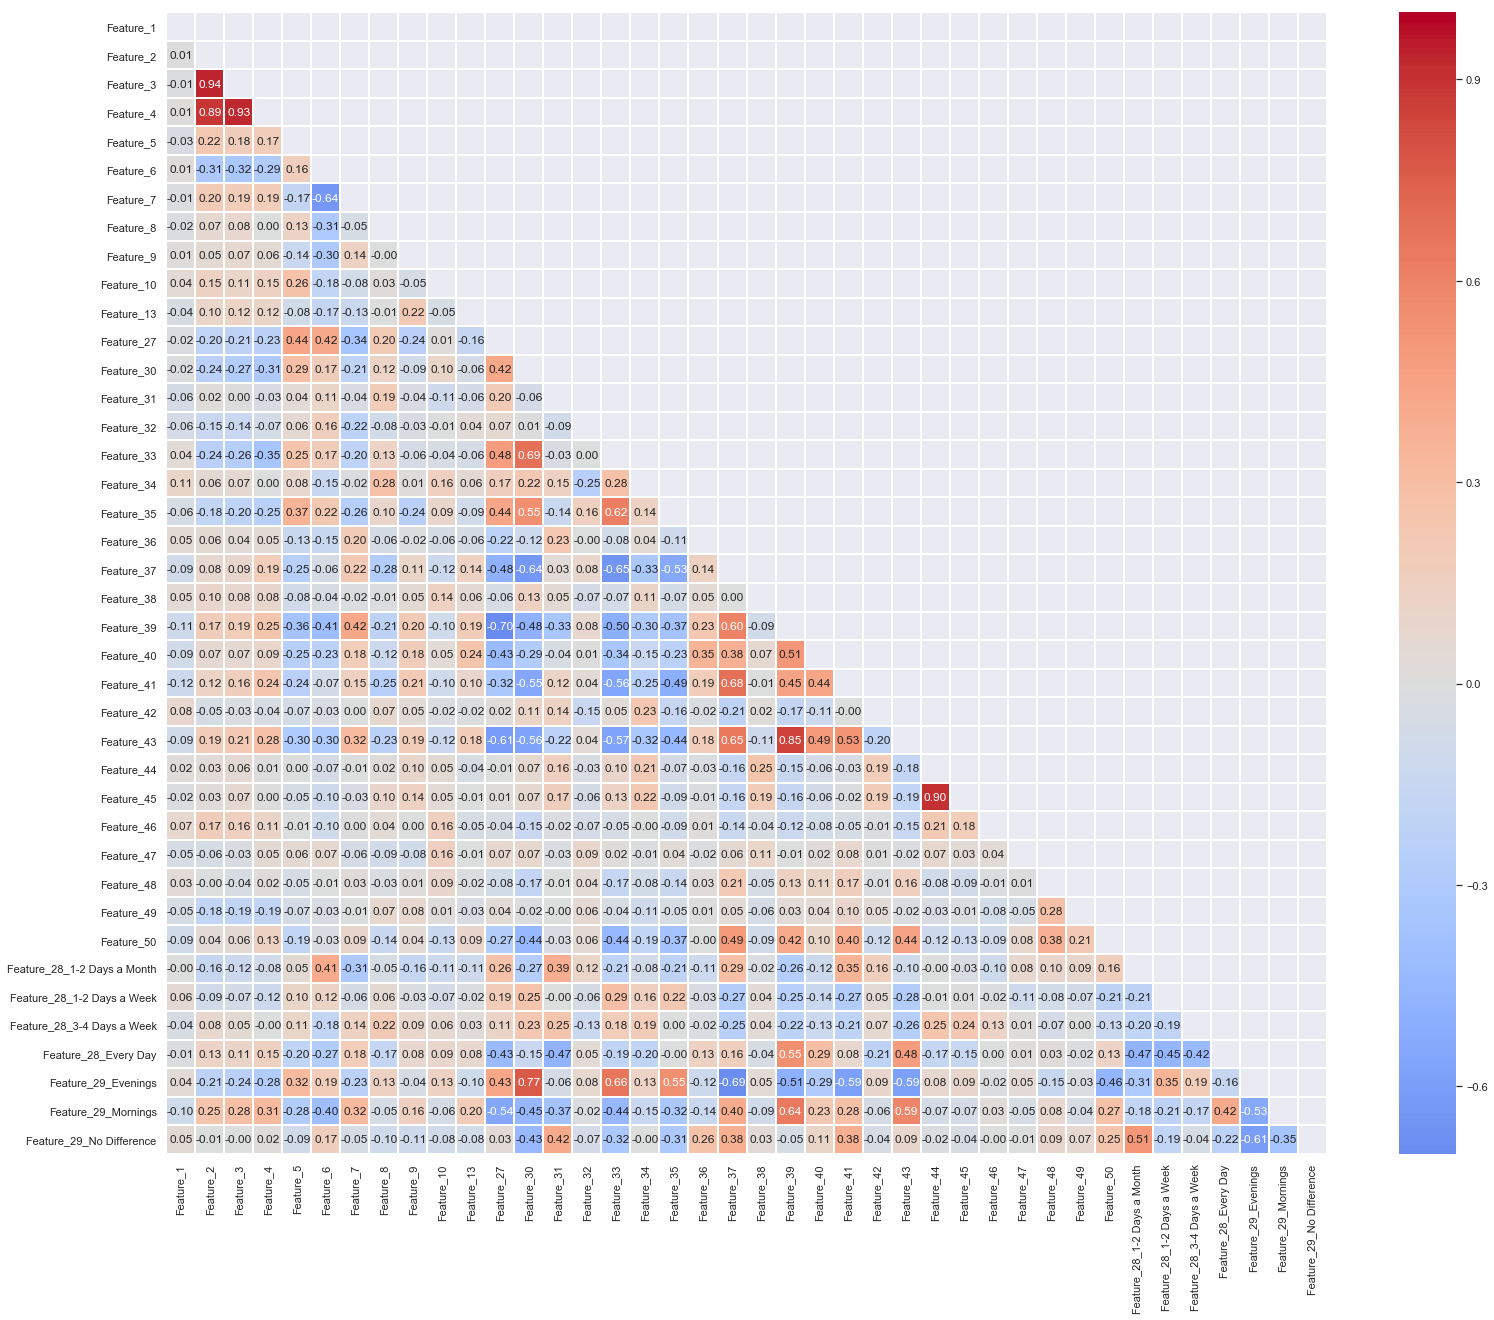

In [108]:
corr = X_train_selected_features.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.set(rc={'figure.figsize':(26,21)})
sns.heatmap(corr, mask=mask, annot=True, center=0, linewidths=1, fmt='.2f', cmap="coolwarm")

From the figure above, we can clearly see highly negative and positive correlated feature pairs. To drop unnecessary features, we first decide a threshold which indicates the minimum correlation score. For each feature, we check if it has any correlation score which exceeds the threshold with other features. If so, we simply drop that feature.

In [109]:
def find_highly_correlated_features(df, threshold):
    corr = df.corr().abs()
    mask = np.triu(np.ones_like(corr, dtype=bool))
    tri_df = corr.mask(mask)

    to_drop = []
    for column in tri_df.columns:
        if any(tri_df[column] > threshold):
            to_drop.append(column)
            print("Feature: ", column, "; Highly Correlated Features: ", list(tri_df[column][tri_df[column] > threshold].index))
    
    return to_drop

In [110]:
to_drop_features_highly_corr = find_highly_correlated_features(X_train_selected_features, threshold=0.92)

Feature:  Feature_2 ; Highly Correlated Features:  ['Feature_3']
Feature:  Feature_3 ; Highly Correlated Features:  ['Feature_4']


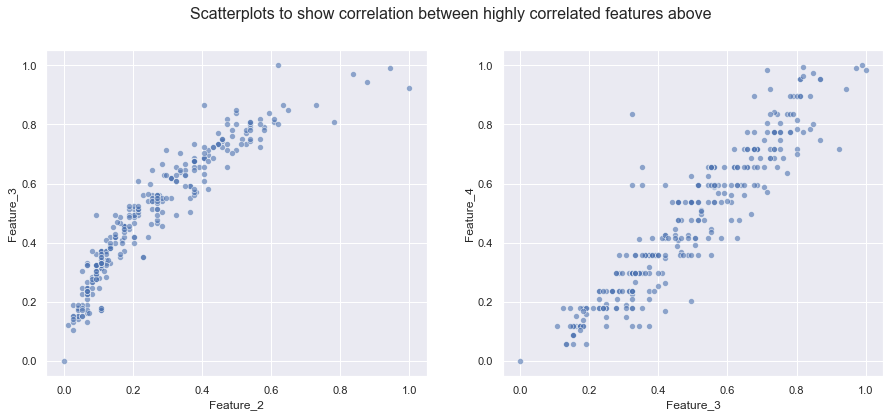

In [111]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,6))
fig.suptitle('Scatterplots to show correlation between highly correlated features above', fontsize=16)
sns.scatterplot(data= X_train_selected_features, x='Feature_2', y='Feature_3', alpha=0.6,  palette= sns.color_palette("hls", 7), legend=False, ax=ax1)
sns.scatterplot(data= X_train_selected_features, x='Feature_3', y='Feature_4', alpha=0.6,  palette= sns.color_palette("hls", 7), legend=False, ax=ax2)

Feature_2 and Feature_3 have the correlation score of **0.94** and Feature_3 and Feature_4 have the correlation score of **0.93**. We may drop one of the feature from the pairs (e.g. **Feature_3** and **Feature_4**). However correlation scores are not so high. So we may need more analysis to be sure.

##### Pragmatic approaches to select features based on feature weights of the model

Each feature has its own weight and model weights which are close to zero will contribute less then other weights to the result. So we can drop the features whose corresponding weight is so small. We will use RFE to iterate that process (training - observing weights and accuracy - dropping features whose weight is close to 0) to get most meaningful features for the model.

In [112]:
def get_important_features_from_model(X, Y, estimator_function, number_of_features_selected):
    rfe = RFE(estimator=estimator_function, n_features_to_select=number_of_features_selected)
    rfe.fit(X, Y)
    mask = rfe.support_

    # return features we should keep
    print(list(X.columns[mask]), '\n')

    #print("Higher rank means the feature was dropped earlier.")
    #for column, rank in zip(X.columns, rfe.ranking_):
    #    print(column, ": ", rank)
    
    return mask

In [113]:
lr_mask = get_important_features_from_model(X_train_selected_features, y_train_le, LogisticRegression(), 10)

['Feature_3', 'Feature_27', 'Feature_30', 'Feature_33', 'Feature_36', 'Feature_37', 'Feature_39', 'Feature_41', 'Feature_43', 'Feature_28_1-2 Days a Month'] 



In [114]:
rfc_mask = get_important_features_from_model(X_train_selected_features, y_train_le, RandomForestClassifier(), 10)

['Feature_2', 'Feature_3', 'Feature_5', 'Feature_37', 'Feature_39', 'Feature_41', 'Feature_43', 'Feature_28_1-2 Days a Month', 'Feature_28_Every Day', 'Feature_29_Evenings'] 



Our selected features as above. We will now use "majority voted" method with using two classifiers which are logistic regression and random forest classifier to select best features:

In [115]:
votes = np.sum([lr_mask, rfc_mask], axis=0)
print("Top important features according to votes (>=2)")
important_features = list(X_train_selected_features.loc[:, votes >=2].columns)
print(important_features)

Top important features according to votes (>=2)
['Feature_3', 'Feature_37', 'Feature_39', 'Feature_41', 'Feature_43', 'Feature_28_1-2 Days a Month']


We run many times to above parts to see the model select which features based on majority voting. Here are the different versions:

In [116]:
final_features_v1 = ['Feature_3', 'Feature_33', 'Feature_37', 'Feature_39', 'Feature_41', 'Feature_43', 'Feature_28_1-2 Days a Month', 'Feature_29_Mornings']

In [117]:
final_features_v2 = ['Feature_3', 'Feature_37', 'Feature_39', 'Feature_41', 'Feature_43', 'Feature_28_1-2 Days a Month']

In [118]:
final_features_v3 = ['Feature_37', 'Feature_39', 'Feature_41', 'Feature_43', 'Feature_28_1-2 Days a Month']

Since final features are not highly correlated each other, we do not frop any features from them (We concluded from the previous section that we found highly correlated features.)

Final X_train with selected features:

In [119]:
X_train_selected_features_v1 = X_train_selected_features[final_features_v1]
X_train_selected_features_v2 = X_train_selected_features[final_features_v2]
X_train_selected_features_v3 = X_train_selected_features[final_features_v3]

In [120]:
X_test_selected_features_v1 = X_test[final_features_v1]
X_test_selected_features_v2 = X_test[final_features_v2]
X_test_selected_features_v3 = X_test[final_features_v3]

In [121]:
# train-test sets are now in --> X_train_selected_features_v2, X_test_selected_features_v2, y_train_le, y_test_le

In [122]:
X_train_selected_features_v2

,Feature_3,Feature_37,Feature_39,Feature_41,Feature_43,Feature_28_1-2 Days a Month
0,0.190476,0.0,0.0,0.0,0.0,0.0
1,0.809524,1.0,1.0,1.0,1.0,0.0
2,0.419048,0.0,0.0,0.0,0.0,0.0
3,0.247619,0.0,0.0,0.0,0.0,0.0
4,0.561905,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...
295,0.333333,0.0,0.0,0.0,0.0,0.0
296,0.723810,1.0,1.0,1.0,1.0,0.0
297,0.942857,0.0,0.0,0.0,0.0,0.0
298,0.676190,1.0,0.0,1.0,0.0,1.0


In [123]:
X_test_selected_features_v2

,Feature_3,Feature_37,Feature_39,Feature_41,Feature_43,Feature_28_1-2 Days a Month
0,0.868132,0.0,0.0,1.0,0.0,0.0
1,0.263736,0.0,0.0,1.0,0.0,0.0
2,0.109890,0.0,0.0,0.0,0.0,0.0
3,0.186813,0.0,0.0,0.0,0.0,0.0
4,0.648352,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
95,0.142857,0.0,0.0,1.0,1.0,1.0
96,0.791209,0.0,0.0,1.0,0.0,0.0
97,0.340659,0.0,0.0,0.0,0.0,1.0
98,0.296703,0.0,0.0,0.0,0.0,0.0


In [124]:
y_train_le

array([0, 2, 0, 0, 2, 0, 0, 2, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       0, 1, 0, 3, 1, 1, 2, 0, 0, 2, 0, 3, 2, 3, 0, 0, 0, 0, 0, 2, 0, 2,
       1, 0, 0, 2, 2, 0, 0, 1, 1, 2, 0, 3, 2, 0, 1, 0, 0, 0, 0, 2, 1, 0,
       0, 2, 2, 0, 0, 0, 2, 1, 2, 1, 2, 0, 0, 0, 0, 2, 2, 3, 0, 0, 1, 0,
       1, 3, 2, 2, 0, 0, 1, 1, 1, 1, 1, 0, 3, 2, 0, 0, 0, 2, 0, 0, 1, 3,
       0, 2, 3, 1, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 2, 1, 0, 1, 0, 1, 0, 2, 0, 1, 0, 0, 0, 2, 0, 0, 2, 0, 3, 0,
       0, 0, 0, 0, 0, 3, 2, 0, 0, 0, 3, 2, 1, 0, 0, 1, 0, 0, 0, 0, 3, 0,
       0, 0, 0, 1, 0, 0, 1, 2, 0, 1, 0, 3, 2, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 2, 0, 2, 0, 2, 2, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 3, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 2, 1, 0, 2, 0, 2, 1, 0, 0, 0, 3,
       3, 0, 3, 2, 0, 0, 1, 0, 0, 0, 1, 2, 0, 3, 0, 1, 0, 0, 2, 2, 2, 0,
       2, 0, 0, 1, 0, 2, 0, 0, 3, 0, 2, 0, 1, 2], d

In [125]:
y_test_le

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 2, 0, 3, 0, 0, 0, 2, 2, 1, 2, 2, 0, 0, 0, 0,
       0, 0, 2, 3, 0, 3, 0, 1, 1, 0, 0, 0, 0, 3, 0, 2, 2, 2, 0, 0, 2, 0,
       1, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       2, 0, 0, 1, 2, 0, 3, 1, 0, 0, 0, 0], dtype=int64)

#### t-SNE Visualization

We can use t-SNE to observe patterns in the data. t-SNE convert n-d feature space that data have into 2-d feature space. It maximize the distance in 2-d space between observations that are most different in a n-d space. After finding our best features, our model may differentiate three classes easily (Disease1, Disease2 and others-3,4), since within class variation decresed and between class variation increased. (Disease 3 and 4 overlap each other. The reason why may be we have already less data for all diseases. However disease 3 and 4 have very few samples according to Disease 1 and 2. And model may have difficulties to differentiate those classes.)

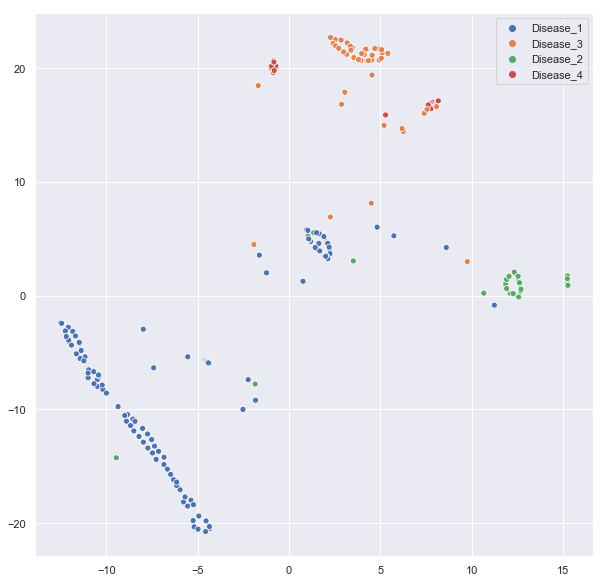

In [126]:
from sklearn.manifold import TSNE

m = TSNE(learning_rate = 50)
tsne_features = m.fit_transform(X_train_selected_features_v1)
sns.set(rc={'figure.figsize':(10,10)})
sns.scatterplot(x=tsne_features[:,0] , y=tsne_features[:,1], hue=[list(le_y_train.classes_)[sample_le] for sample_le in y_train_le])
plt.show()

### Model

In [66]:
lr = LogisticRegression()
rfc = RandomForestClassifier()
knn = KNeighborsClassifier()

param_lr = {'penalty': ['l1','l2'], 
            'C': [0.001,0.01,0.1,1,10,100,1000]}

param_rfc = {'criterion': ['gini', 'entropy'], 
             'max_features' : ['auto', 'sqrt'],
             'min_samples_split' : [2, 5, 10, 15], 
             'min_samples_leaf' : [1, 2, 4, 8]}

param_knn = {'n_neighbors':[3,5,7,9,11], 
             'weights':['uniform', 'distance'], 
             'p':[1,2]}

models = [lr, rfc, knn]
params = [param_lr, param_rfc, param_knn]
model_name = ['LogisticRegression', 'RandomForestClassifier', 'KNeighborsClassifier']
model_accs_od = []

for i in range(len(models)):
    print("Model : ", model_name[i])
   
    model_cv = GridSearchCV(models[i], params[i], cv=10)
    model_cv.fit(X_train_selected_features_v1, y_train_le)
    preds = model_cv.predict(X_test_selected_features_v1)
    acc = accuracy_score(preds, y_test_le)
    model_accs_od.append(acc)
    
    print("Best parameters for the model: ", model_cv.best_params_)
    #print(model_cv.best_score_)
    print("Accuracy score for the best model: ", acc)
    print("------------------------------------------")

Model :  LogisticRegression
Best parameters for the model:  {'C': 10, 'penalty': 'l2'}
Accuracy score for the best model:  0.95
------------------------------------------
Model :  RandomForestClassifier
Best parameters for the model:  {'criterion': 'gini', 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 10}
Accuracy score for the best model:  0.96
------------------------------------------
Model :  KNeighborsClassifier
Best parameters for the model:  {'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}
Accuracy score for the best model:  0.95
------------------------------------------


### Evaluation

In [67]:
rfc = RandomForestClassifier(criterion= 'entropy', max_features= 'sqrt', min_samples_leaf= 1, min_samples_split= 15)
rfc.fit(X_train_selected_features_v1, y_train_le)
preds = rfc.predict(X_test_selected_features_v1)
print("Accuracy Score: ", accuracy_score(preds, y_test_le))

Accuracy Score:  0.96


#### Confusion Matrix

[Text(0,0.5,'Disease_1'),
 Text(0,1.5,'Disease_2'),
 Text(0,2.5,'Disease_3'),
 Text(0,3.5,'Disease_4')]

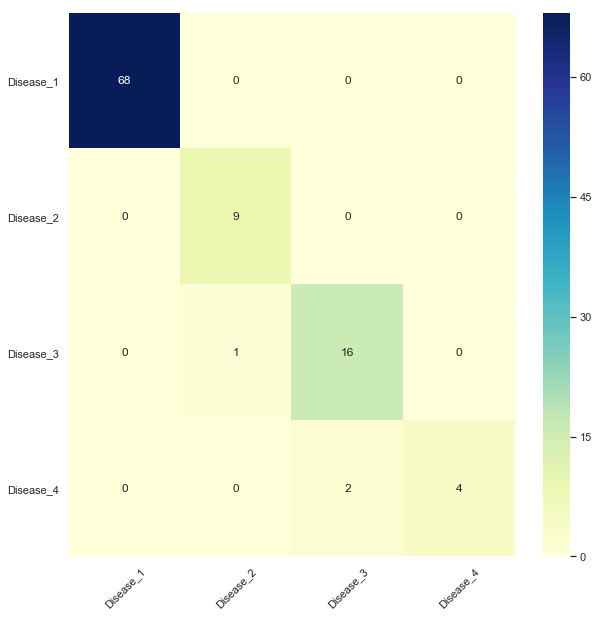

In [81]:
cm = sns.heatmap(confusion_matrix(y_test_le, preds), annot=True, fmt="d", cmap="YlGnBu")
cm.set_xticklabels(le_y_train.classes_, rotation=45)
cm.set_yticklabels(le_y_train.classes_, rotation=0)

#### Classification Report

In [83]:
print(classification_report(y_test_le, preds, target_names=le_y_train.classes_))

             precision    recall  f1-score   support

  Disease_1       1.00      1.00      1.00        68
  Disease_2       0.90      1.00      0.95         9
  Disease_3       0.89      0.94      0.91        17
  Disease_4       1.00      0.67      0.80         6

avg / total       0.97      0.97      0.97       100



### Store the best model, concatenate train & test set and save as csv file

After we test our validated model, we can now concatenate our train and test set. We also store our best classifier, related hyperparameters and selected feature names.

In [70]:
best_classifier = "RandomForestClassifier"
best_classifier_params = "criterion= 'entropy', max_features= 'sqrt', min_samples_leaf= 1, min_samples_split= 15"
best_model_feature_names = ['Feature_3', 'Feature_28', 'Feature_29', 'Feature_33', 'Feature_37', 'Feature_39', 'Feature_41', 'Feature_43']

best_model_info = {'best_classifier' : best_classifier, 
                   'best_classifier_params' : best_classifier_params, 
                   'best_model_feature_names' : best_model_feature_names}

In [494]:
X = pd.concat([X_train_backup, X_test_backup], axis=0).sort_index()

In [495]:
y = pd.DataFrame(pd.concat([y_train, y_test], axis=0).sort_index())

In [497]:
X.to_csv('features.csv', index=False)

In [498]:
y.to_csv('target.csv', index=False)

In [71]:
import json
with open("best_model_info.json", "w") as f:
    json.dump(best_model_info, f)

### References

[1] https://learn.datacamp.com/courses/dimensionality-reduction-in-python<br>
[2] https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74 <br>
[3] https://towardsdatascience.com/logistic-regression-model-tuning-with-scikit-learn-part-1-425142e01af5 <br>
[4] https://machinelearningmastery.com/scikit-optimize-for-hyperparameter-tuning-in-machine-learning/ <br>

---